In [9]:
import numpy as np

sensitivity = lambda x:x['TP']/x['P']
specificity = lambda x:x['TN']/x['N']
precision = lambda x:x['TP']/(x['TP']+x['FP'])
accuracy = lambda x:(x['TP']+x['TN'])/(x['P']+x['N'])
f1 = lambda x:(2*x['TP'])/(2*x['TP']+x['FP']+x['FN'])

def stats_from_confmat(confMat):
    stats = {'TP':confMat[0,0],
            'TN':confMat[1,1], 
            'FP':confMat[1,0],
            'FN':confMat[0,1],
            'P':confMat[0,0]+confMat[0,1],
            'N':confMat[1,0]+confMat[1,1]}
    return stats


def display_stats(confmat):
    print(confmat)
    stats = stats_from_confmat(confmat)
    print(f"P/P+N: {stats['P']/(stats['P']+stats['N'])}")
    PP = stats['TP'] + stats['FP']
    PN = stats['FN'] + stats['TN']
    print(f"VP/PP: {stats['TP']/PP}")
    print(f'Sensitivity {sensitivity(stats)}')
    print(f'Specificity {specificity(stats)}')
    print(f'Precision {precision(stats)}')
    print(f'Accuracy {accuracy(stats)}')
    print(f'F1 {accuracy(stats)}')



c = np.asarray([0, 0, 1, 100]).reshape(2,2)
display_stats(c)
print(25*'*')
c = np.asarray([100, 0, 0, 100]).reshape(2,2)
display_stats(c)
print(25*'*')
c = np.asarray([50, 50, 50, 50]).reshape(2,2)
display_stats(c)
print(25*'*')
c = np.asarray([0, 0, 100, 100]).reshape(2,2)
display_stats(c)



[[  0   0]
 [  1 100]]
P/P+N: 0.0
VP/PP: 0.0
Sensitivity nan
Specificity 0.9900990099009901
Precision 0.0
Accuracy 0.9900990099009901
F1 0.9900990099009901
*************************
[[100   0]
 [  0 100]]
P/P+N: 0.5
VP/PP: 1.0
Sensitivity 1.0
Specificity 1.0
Precision 1.0
Accuracy 1.0
F1 1.0
*************************
[[50 50]
 [50 50]]
P/P+N: 0.5
VP/PP: 0.5
Sensitivity 0.5
Specificity 0.5
Precision 0.5
Accuracy 0.5
F1 0.5
*************************
[[  0   0]
 [100 100]]
P/P+N: 0.0
VP/PP: 0.0
Sensitivity nan
Specificity 0.5
Precision 0.0
Accuracy 0.5
F1 0.5


/tmp/ipykernel_5536/2887267880.py:3: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = lambda x:x['TP']/x['P']


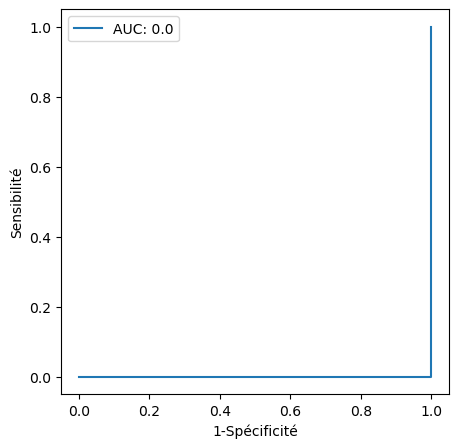

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
P = int(1e2)
N = int(5e2)
gt = N*[0] + P *[1]
gt = np.array(gt)
threshold = 0.5
prob = np.concatenate([1-np.random.uniform(threshold, 1.0, size=N), np.random.uniform(threshold, 1.0, size=P)])
prob = np.expand_dims(prob, 1)
fig, ax_roc = plt.subplots(1, 1, figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(gt, 1-prob)
score = auc(fpr, tpr)

ax_roc.plot(fpr, tpr, label=f'AUC: {score}')
ax_roc.fill_between(fpr, tpr, alpha=0.25)
ax_roc.legend()
ax_roc.set_xlabel('1-Spécificité')
ax_roc.set_ylabel('Sensibilité')
plt.savefig('metric/worst_AUC.png')

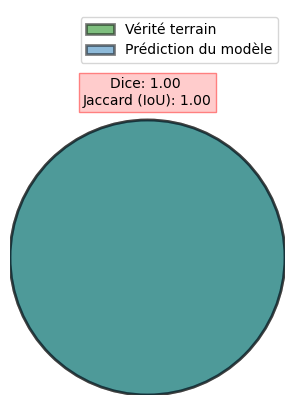

In [92]:
fix, ax = plt.subplots(1, 1, figsize=(5, 5))


x1 = -0.
x2 = 0.
r = 0.5
circle = plt.Circle((x1, 0), radius=r, alpha=0.5, facecolor='green', edgecolor='black', 
                    linewidth=2, label='Vérité terrain')
circle2 = plt.Circle((x2, 0), radius=r, alpha=0.5, edgecolor='black', linewidth=2,
                    label='Prédiction du modèle')

d = np.abs(x2-x1)
# h = np.sqrt(4*r**2-d**2)
h = d/2
aire_inter = 2*r**2*np.arccos(h/r) - 2*h * np.sqrt(r**2 - h**2)
aire_cercle = np.pi * r**2
dice = 2 *  aire_inter / (aire_cercle+aire_cercle)
jaccard = aire_inter / (aire_cercle*2 - aire_inter)
ax.add_patch(circle)
ax.add_patch(circle2)
ax.set_xlim([x1-r, x2+r])
ax.set_ylim([-r, r+0.8*r])
ax.set_aspect('equal')
text = f'Dice: {dice:.2f} \nJaccard (IoU): {jaccard:.2f}'
plt.text(x1, 0.6, text, ha="center", va="center",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
plt.legend()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.axes.xaxis.set_visible(False)
ax.axis('off')
plt.savefig('metric/perfect_dice.png')

In [52]:
jaccard

0.0